# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

## Load the data into a DataFrame
# pd.read_csv()
salesdata = pd.read_csv("Iowa_Liquor_Sales_reduced.csv")
## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

salesdata.head()

/Users/katty/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.6,2.54
4,03/31/2016,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.5,1.19


In [2]:
salesdata.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [3]:
salesdata["Date"] = pd.to_datetime(salesdata["Date"])

In [4]:
def dollarconverter(item):
    newitem = item.replace("$", "")
    return float(newitem)

dollarconverter("$29.99")

29.99

In [5]:
salesdata["State Bottle Cost"] = salesdata["State Bottle Cost"].apply(dollarconverter)
salesdata["State Bottle Retail"] = salesdata["State Bottle Retail"].apply(dollarconverter)
salesdata["Sale (Dollars)"] = salesdata["Sale (Dollars)"].apply(dollarconverter)

In [6]:
salesdata.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [7]:
salesdata.sort_values("Store Number").head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1098831,2015-10-01,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,421,903663,William L. Weller Bourbon HA,750,40.10,60.15,1,60.15,0.75,0.20
1439093,2015-08-06,2106,CEDAR FALLS,50613,7.0,Black Hawk,1012100.0,CANADIAN WHISKIES,260,10807,Crown Royal Regal Apple,750,15.00,22.50,24,540.00,18.00,4.76
444187,2016-01-14,2106,CEDAR FALLS,50613,7.0,Black Hawk,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,35,43156,Bacardi 151 Proof Rum,750,13.50,20.25,12,243.00,9.00,2.38
205318,2016-02-25,2106,CEDAR FALLS,50613,7.0,Black Hawk,1022100.0,TEQUILA,434,87937,Juarez Tequila Silver,1000,6.92,10.38,12,124.56,12.00,3.17
126278,2016-03-10,2106,CEDAR FALLS,50613,7.0,Black Hawk,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,389,64776,Cointreau Liqueur,750,19.99,29.99,12,359.88,9.00,2.38


In [8]:
salesdata["Revenue (Dollars)"] = salesdata["Bottles Sold"] * (salesdata["State Bottle Retail"]-salesdata["State Bottle Cost"])

In [9]:
salesdata.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Revenue (Dollars)
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19,60.00
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,0.53,12.50
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.5,2.77,17.94


In [10]:
salesdata.sort_values("Item Description").head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Revenue (Dollars)
2595317,2015-01-22,4988,CEDAR FALLS,50613,7.0,Black Hawk,1062050.0,BARBADOS RUM,420,42936,10 Cane Rum,750,12.5,18.75,1,18.75,0.75,0.20,6.25
2580299,2015-01-26,3773,CEDAR RAPIDS,52401,57.0,Linn,1062050.0,BARBADOS RUM,420,42936,10 Cane Rum,750,12.5,18.75,3,56.25,2.25,0.59,18.75
2573527,2015-01-27,2552,CEDAR RAPIDS,52404,57.0,Linn,1062050.0,BARBADOS RUM,420,42936,10 Cane Rum,750,12.5,18.75,1,18.75,0.75,0.20,6.25
2678720,2015-01-07,2633,DES MOINES,50320,77.0,Polk,1062050.0,BARBADOS RUM,420,42936,10 Cane Rum,750,12.5,18.75,6,112.50,4.50,1.19,37.50
2603079,2015-01-21,2670,CORALVILLE,52241,52.0,Johnson,1062050.0,BARBADOS RUM,420,42936,10 Cane Rum,750,12.5,18.75,6,112.50,4.50,1.19,37.50


In [11]:
salesdata["Revenue per Bottle"] = salesdata["Revenue (Dollars)"] / salesdata["Bottles Sold"]
salesdata.sort_values("Revenue per Bottle", ascending = False).head(10)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Revenue (Dollars),Revenue per Bottle
72996,2016-03-21,2512,IOWA CITY,52240,52.0,Johnson,1011600.0,CORN WHISKIES,125,927011,Cedar Ridge Rye Whiskey - Whole Cask Buy,189000,6468.0,9702.0,1,9702.0,189.00,49.93,3234.0,3234.0
711198,2015-12-07,2560,MARION,52302,57.0,Linn,1011600.0,CORN WHISKIES,125,927015,Cedar Ridge Malted Rye Barrel Marion,180000,6100.0,9150.0,1,9150.0,180.00,47.55,3050.0,3050.0
721866,2015-12-03,2663,URBANDALE,50322,77.0,Polk,1011600.0,CORN WHISKIES,125,927014,Cedar Ridge Malted Rye Barrel Urbandale,180000,6100.0,9150.0,1,9150.0,180.00,47.55,3050.0,3050.0
953138,2015-10-27,2666,ANKENY,50023,77.0,Polk,1011300.0,TENNESSEE WHISKIES,125,987084,Cedar Ridge Port Cask Finish Barrel #2666,750,6000.0,9000.0,1,9000.0,0.75,0.20,3000.0,3000.0
939071,2015-10-29,2561,DES MOINES,50321,77.0,Polk,1011300.0,TENNESSEE WHISKIES,125,987087,Cedar Ridge Port Cask Finish Barrel #2561,750,6000.0,9000.0,1,9000.0,0.75,0.20,3000.0,3000.0
934879,2015-10-29,2663,URBANDALE,50322,77.0,Polk,1011300.0,TENNESSEE WHISKIES,125,987085,Cedar Ridge Port Cask Finish Barrel #2663,750,6000.0,9000.0,1,9000.0,0.75,0.20,3000.0,3000.0
971130,2015-10-26,2590,CEDAR RAPIDS,52402,57.0,Linn,1011300.0,TENNESSEE WHISKIES,125,987086,Cedar Ridge Port Cask Finish Barrel #2590,750,6000.0,9000.0,1,9000.0,0.75,0.20,3000.0,3000.0
956990,2015-10-27,2666,ANKENY,50023,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,125,987088,Cedar Ridge Barrel Proof Bourbon Barrel #2666,750,5800.0,8700.0,1,8700.0,0.75,0.20,2900.0,2900.0
888965,2015-11-09,2588,CEDAR RAPIDS,52403,57.0,Linn,1011250.0,SINGLE BARREL BOURBON WHISKIES,125,927368,Cedar Ridge Barrel Proof Bourbon,750,5800.0,8700.0,1,8700.0,0.75,0.20,2900.0,2900.0
959034,2015-10-27,2552,CEDAR RAPIDS,52404,57.0,Linn,1011250.0,SINGLE BARREL BOURBON WHISKIES,125,987089,Cedar Ridge Barrel Proof Bourbon Barrel #2552,750,5800.0,8700.0,1,8700.0,0.75,0.20,2900.0,2900.0


In [12]:
#create table using only the columns we need
salesdatafinal = salesdata.drop(["County Number", "Category", "Vendor Number", "Item Number", "Volume Sold (Gallons)", "Revenue per Bottle"], 1)

In [13]:
salesdatafinal.head().sort_values("Store Number")

,Date,Store Number,City,Zip Code,County,Category Name,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenue (Dollars)
3,2016-03-31,2190,DES MOINES,50314,Polk,VODKA FLAVORED,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.6,53.76
2,2016-03-31,4959,CEDAR FALLS,50613,Black Hawk,AMERICAN COCKTAILS,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.5,17.94
0,2016-03-31,5029,DAVENPORT,52806,Scott,TEQUILA,Avion Silver,375,9.99,14.99,12,179.88,4.5,60.00
1,2016-03-31,5029,DAVENPORT,52806,Scott,TEQUILA,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,12.50
4,2016-03-31,5240,WEST BRANCH,52358,NaN,CREAM LIQUEURS,Rumchata,750,12.50,18.75,6,112.50,4.5,37.50


In [14]:
#identify the date range of this data
print "oldest date: " , max(salesdatafinal["Date"])
print "newest date: " , min(salesdatafinal["Date"])

oldest date:  2016-03-31 00:00:00
newest date:  2015-01-05 00:00:00


In [15]:
salesdatafinal[["Item Description","State Bottle Retail"]].sort_values("State Bottle Retail").head()

,Item Description,State Bottle Retail
1284676,Fireball Cinnamon Whisky,1.34
474042,Fireball Cinnamon Whisky,1.34
474039,Fireball Cinnamon Whisky,1.34
474036,Fireball Cinnamon Whisky,1.34
474033,Fireball Cinnamon Whisky,1.34


In [16]:
#will assume that state bottle retail is the same throughout
salesdatafinal[["Item Description","State Bottle Retail"]].sort_values("State Bottle Retail").tail(5)

,Item Description,State Bottle Retail
971130,Cedar Ridge Port Cask Finish Barrel #2590,9000.0
939071,Cedar Ridge Port Cask Finish Barrel #2561,9000.0
711198,Cedar Ridge Malted Rye Barrel Marion,9150.0
721866,Cedar Ridge Malted Rye Barrel Urbandale,9150.0
72996,Cedar Ridge Rye Whiskey - Whole Cask Buy,9702.0


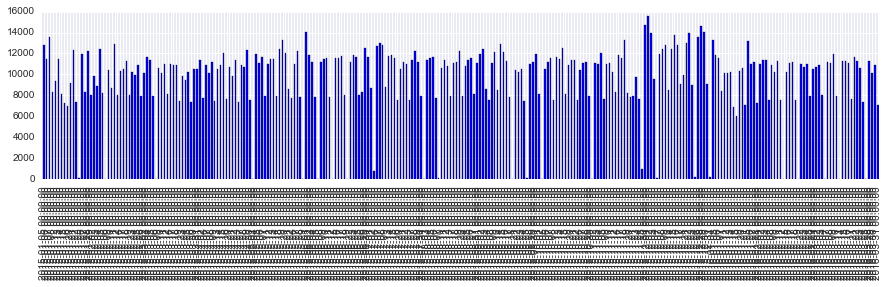

In [17]:
#assume seasonality does not exist
salesdatafinal["Date"].value_counts().sort_index().plot(kind = "bar", figsize = (15,3), color = "blue")

In [19]:
#create a key to cross reference store number, city, zip code and counties
salesdatakey = salesdatafinal.drop(["Date", "Category Name", "Item Description", "Bottle Volume (ml)", "State Bottle Cost", "State Bottle Retail", "Bottles Sold", "Sale (Dollars)", "Volume Sold (Liters)", "Revenue (Dollars)"], 1)

In [20]:
salesdatakey.drop_duplicates("Store Number", inplace = True)

In [21]:
salesdatakey.head()

,Store Number,City,Zip Code,County
0,5029,DAVENPORT,52806,Scott
2,4959,CEDAR FALLS,50613,Black Hawk
3,2190,DES MOINES,50314,Polk
4,5240,WEST BRANCH,52358,NaN
5,4988,CEDAR FALLS,50613,Black Hawk


In [22]:
salesdatakey["City"].value_counts()

DES MOINES         89
CEDAR RAPIDS       77
WATERLOO           46
DAVENPORT          44
COUNCIL BLUFFS     42
SIOUX CITY         34
WEST DES MOINES    30
DUBUQUE            29
IOWA CITY          26
AMES               25
ANKENY             21
URBANDALE          18
CEDAR FALLS        17
FORT DODGE         16
MUSCATINE          15
MASON CITY         14
BURLINGTON         14
CORALVILLE         14
MARSHALLTOWN       12
BETTENDORF         12
MARION             11
CLINTON            11
OTTUMWA            10
CLIVE              10
JOHNSTON           10
STORM LAKE         10
ALTOONA             9
BOONE               9
NORTH LIBERTY       9
INDIANOLA           8
                   ..
DAYTON              1
MADRID              1
BUSSEY              1
ROBINS              1
KELLOGG             1
KINGSLEY            1
WALL LAKE           1
LE GRAND            1
BLOOMFIELD          1
TABOR               1
MARCUS              1
VINTON              1
WEST POINT          1
ELLSWORTH           1
GILBERTVIL

In [23]:
salesdatakey["Store Number"].isnull().value_counts()

False    1403
Name: Store Number, dtype: int64

In [24]:
salesdatakey["City"].isnull().value_counts()

False    1403
Name: City, dtype: int64

In [25]:
salesdatakey["Zip Code"].isnull().value_counts()

False    1403
Name: Zip Code, dtype: int64

In [26]:
salesdatakey["County"].isnull().value_counts()

False    1360
True       43
Name: County, dtype: int64

In [27]:
#County is missing some information - might be best to start with the other ones
salesdata["County"].isnull().value_counts()

False    2698639
True       10913
Name: County, dtype: int64

In [470]:
print "percent of missing values in county", 10913/2698639.0

percent of missing values in county 0.0040438902721


In [28]:
salesdatafinal.sort_values("Date", ascending = True, inplace = True)

In [29]:
salesdatafinal.head()

,Date,Store Number,City,Zip Code,County,Category Name,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenue (Dollars)
2709551,2015-01-05,2643,WATERLOO,50701,Black Hawk,SCOTCH WHISKIES,Johnnie Walker Blue,750,130.00,195.00,1,195.00,0.75,65.00
2701033,2015-01-05,3679,MONONA,52159,Clayton,TEQUILA,La Prima Tequila/gold,1000,6.59,9.89,1,9.89,1.00,3.30
2701032,2015-01-05,2648,WEST DES MOINES,50265,Polk,BARBADOS RUM,Shellback Silver,750,8.00,12.00,4,48.00,3.00,16.00
2701031,2015-01-05,3563,MUSCATINE,52761,Muscatine,STRAIGHT BOURBON WHISKIES,Evan Williams Str Bourbon,750,7.47,11.21,12,134.52,9.00,44.88
2701030,2015-01-05,2190,DES MOINES,50314,Polk,IMPORTED VODKA - MISC,Ciroc Amaretto,200,5.00,7.50,1,7.50,0.20,2.50


In [30]:
salesdatafinal.reset_index(inplace = True)
salesdatafinal.head()

,index,Date,Store Number,City,Zip Code,County,Category Name,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenue (Dollars)
0,2709551,2015-01-05,2643,WATERLOO,50701,Black Hawk,SCOTCH WHISKIES,Johnnie Walker Blue,750,130.00,195.00,1,195.00,0.75,65.00
1,2701033,2015-01-05,3679,MONONA,52159,Clayton,TEQUILA,La Prima Tequila/gold,1000,6.59,9.89,1,9.89,1.00,3.30
2,2701032,2015-01-05,2648,WEST DES MOINES,50265,Polk,BARBADOS RUM,Shellback Silver,750,8.00,12.00,4,48.00,3.00,16.00
3,2701031,2015-01-05,3563,MUSCATINE,52761,Muscatine,STRAIGHT BOURBON WHISKIES,Evan Williams Str Bourbon,750,7.47,11.21,12,134.52,9.00,44.88
4,2701030,2015-01-05,2190,DES MOINES,50314,Polk,IMPORTED VODKA - MISC,Ciroc Amaretto,200,5.00,7.50,1,7.50,0.20,2.50


In [32]:
salesdatafinal[salesdatafinal["Date"] == "2016-01-04"].index.tolist()

[2184483,
 2184484,
 2184485,
 2184486,
 2184487,
 2184488,
 2184489,
 2184490,
 2184491,
 2184492,
 2184493,
 2184494,
 2184495,
 2184496,
 2184497,
 2184498,
 2184499,
 2184500,
 2184501,
 2184502,
 2184503,
 2184504,
 2184505,
 2184506,
 2184507,
 2184508,
 2184509,
 2184510,
 2184511,
 2184512,
 2184513,
 2184514,
 2184515,
 2184516,
 2184517,
 2184518,
 2184519,
 2184520,
 2184521,
 2184522,
 2184523,
 2184524,
 2184525,
 2184526,
 2184527,
 2184528,
 2184529,
 2184530,
 2184531,
 2184532,
 2184533,
 2184534,
 2184535,
 2184536,
 2184537,
 2184538,
 2184539,
 2184540,
 2184541,
 2184542,
 2184543,
 2184544,
 2184545,
 2184546,
 2184547,
 2184548,
 2184549,
 2184550,
 2184551,
 2184552,
 2184553,
 2184554,
 2184555,
 2184556,
 2184557,
 2184558,
 2184559,
 2184560,
 2184561,
 2184562,
 2184563,
 2184564,
 2184565,
 2184566,
 2184567,
 2184568,
 2184569,
 2184570,
 2184571,
 2184572,
 2184573,
 2184574,
 2184575,
 2184576,
 2184577,
 2184578,
 2184579,
 2184580,
 2184581,
 2184582,


In [33]:
#all analyses moving forward will be for 2015
salesdatafinal2015 = salesdatafinal[:2184483]
salesdatafinal2015.tail()

,index,Date,Store Number,City,Zip Code,County,Category Name,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenue (Dollars)
2184478,525192,2015-12-31,5089,MISSOURI VALLEY,51555,Harrison,VODKA 80 PROOF,Smirnoff Vodka Traveller,750,8.25,12.38,4,49.52,3.00,16.52
2184479,525191,2015-12-31,5089,MISSOURI VALLEY,51555,Harrison,IMPORTED GRAPE BRANDIES,Hennessy Vs Cognac Minis,600,28.14,42.21,1,42.21,0.60,14.07
2184480,525197,2015-12-31,4165,ANKENY,50023,Polk,CANADIAN WHISKIES,Crown Royal Canadian Whisky,1750,31.99,47.99,1,47.99,1.75,16.00
2184481,525190,2015-12-31,4169,DES MOINES,50317,Polk,TENNESSEE WHISKIES,Jack Daniels Old #7 Black Lbl,1000,18.38,27.57,4,110.28,4.00,36.76
2184482,525189,2015-12-31,4374,GRIMES,50111,Polk,IMPORTED VODKA,Grey Goose Vodka,375,9.00,13.50,3,40.50,1.12,13.50


In [34]:
del salesdatafinal2015["index"]
salesdatafinal2015.head()

,Date,Store Number,City,Zip Code,County,Category Name,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenue (Dollars)
0,2015-01-05,2643,WATERLOO,50701,Black Hawk,SCOTCH WHISKIES,Johnnie Walker Blue,750,130.00,195.00,1,195.00,0.75,65.00
1,2015-01-05,3679,MONONA,52159,Clayton,TEQUILA,La Prima Tequila/gold,1000,6.59,9.89,1,9.89,1.00,3.30
2,2015-01-05,2648,WEST DES MOINES,50265,Polk,BARBADOS RUM,Shellback Silver,750,8.00,12.00,4,48.00,3.00,16.00
3,2015-01-05,3563,MUSCATINE,52761,Muscatine,STRAIGHT BOURBON WHISKIES,Evan Williams Str Bourbon,750,7.47,11.21,12,134.52,9.00,44.88
4,2015-01-05,2190,DES MOINES,50314,Polk,IMPORTED VODKA - MISC,Ciroc Amaretto,200,5.00,7.50,1,7.50,0.20,2.50


In [384]:
#wanted to see if we could use categories as a feature - too many varieties to use
salesdatafinal2015["Category Name"].value_counts().sort_index()

100 PROOF VODKA                        24816
AMARETTO - IMPORTED                       30
AMERICAN ALCOHOL                        4852
AMERICAN AMARETTO                      10952
AMERICAN COCKTAILS                     55768
AMERICAN DRY GINS                      53558
AMERICAN GRAPE BRANDIES                52167
AMERICAN SLOE GINS                      1322
ANISETTE                                 337
APPLE SCHNAPPS                          6684
APRICOT BRANDIES                        8506
BARBADOS RUM                            3369
BLACKBERRY BRANDIES                    12423
BLENDED WHISKIES                       93133
BOTTLED IN BOND BOURBON                 1806
BUTTERSCOTCH SCHNAPPS                   6909
CANADIAN WHISKIES                     216262
CHERRY BRANDIES                         2600
CINNAMON SCHNAPPS                       5933
COFFEE LIQUEURS                        15481
CORN WHISKIES                             41
CREAM LIQUEURS                         51070
CREME DE A

In [35]:
salesdatastore2015 = pd.pivot_table(salesdatafinal2015, index = ["Store Number"], values = ["Sale (Dollars)", "Bottles Sold", "Revenue (Dollars)"], aggfunc = sum).sort_values("Sale (Dollars)", ascending = False)

In [36]:
#creating a table that is a sum of a stores sales in 2015
salesdatastore2015.reset_index(inplace = True)
salesdatastore2015.head()

,Store Number,Bottles Sold,Revenue (Dollars),Sale (Dollars)
0,2633,595205,3282140.27,9839393.08
1,4829,520100,2916236.61,8742779.31
2,2512,282804,1387461.81,4155665.47
3,3385,245312,1318267.65,3947176.01
4,3420,192664,1143907.91,3422351.55


In [37]:
salesdatastore2015["Revenue per Bottle"] = salesdatastore2015["Revenue (Dollars)"] / salesdatastore2015["Bottles Sold"]
salesdatastore2015["Sale per Bottle"] = salesdatastore2015["Sale (Dollars)"] / salesdatastore2015["Bottles Sold"]

In [38]:
salesdatastore2015.sort_values("Store Number").head()

,Store Number,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle
25,2106,99998,478695.22,1434369.85,4.787048,14.343985
604,2113,6483,28693.18,85763.42,4.425911,13.228971
47,2130,72562,369675.74,1108184.99,5.094619,15.272250
681,2152,5928,24143.45,72080.36,4.072782,12.159305
234,2178,20504,93235.51,277987.96,4.547186,13.557743


In [42]:
#confirm salesdatafinal does have duplication of store numbers
salesdatafinal[salesdatafinal["Store Number"] == 2512]

,index,Date,Store Number,City,Zip Code,County,Category Name,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Revenue (Dollars)
12,2701022,2015-01-05,2512,IOWA CITY,52240,Johnson,MISC. AMERICAN CORDIALS & LIQUEURS,Kinky Blue,750,10.00,15.00,6,90.00,4.50,30.00
85,2700999,2015-01-05,2512,IOWA CITY,52240,Johnson,IMPORTED VODKA - MISC,Three Olives Pomegranate Vodka,750,9.96,14.94,24,358.56,18.00,119.52
153,2701080,2015-01-05,2512,IOWA CITY,52240,Johnson,IMPORTED VODKA - MISC,Three Olives Cherry Vodka,750,9.96,14.94,24,358.56,18.00,119.52
175,2701108,2015-01-05,2512,IOWA CITY,52240,Johnson,IMPORTED VODKA,Three Olives Vodka,750,9.96,14.94,24,358.56,18.00,119.52
296,2700787,2015-01-05,2512,IOWA CITY,52240,Johnson,CANADIAN WHISKIES,Crown Royal Canadian Whisky,1000,18.50,27.75,60,1665.00,60.00,555.00
298,2700861,2015-01-05,2512,IOWA CITY,52240,Johnson,TEQUILA,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,12,225.00,12.00,75.00
305,2700929,2015-01-05,2512,IOWA CITY,52240,Johnson,SINGLE BARREL BOURBON WHISKIES,Eagle Rare,750,17.16,25.74,6,154.44,4.50,51.48
398,2701161,2015-01-05,2512,IOWA CITY,52240,Johnson,SPICED RUM,Sailor Jerry Spiced Navy Rum,1750,19.25,28.88,6,173.28,10.50,57.78
576,2701507,2015-01-05,2512,IOWA CITY,52240,Johnson,SINGLE MALT SCOTCH,Balvenie 12yr Doublewood Single Malt Scotch,750,33.60,50.40,6,302.40,4.50,100.80
782,2701301,2015-01-05,2512,IOWA CITY,52240,Johnson,IMPORTED VODKA - MISC,Three Olives Berry Vodka,750,9.96,14.94,12,179.28,9.00,59.76


In [43]:
salesdatastore2015 = pd.merge(salesdatastore2015, salesdatakey, how = "inner")

In [44]:
salesdatastore2015.head(3)

,Store Number,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,City,Zip Code,County
0,2633,595205,3282140.27,9839393.08,5.514302,16.531100,DES MOINES,50320,Polk
1,4829,520100,2916236.61,8742779.31,5.607069,16.809804,DES MOINES,50314,Polk
2,2512,282804,1387461.81,4155665.47,4.906090,14.694507,IOWA CITY,52240,Johnson


In [45]:
salesdatastore2015.describe()

,Store Number,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle
count,1375.000000,1375.000000,1.375000e+03,1.375000e+03,1375.000000,1375.000000
mean,4249.112727,15689.049455,6.913828e+04,2.067844e+05,3.926291,11.738042
std,857.290128,31518.959294,1.679676e+05,5.031273e+05,1.086593,3.246062
min,2106.000000,103.000000,2.268000e+02,6.799800e+02,1.262545,3.781770
25%,3858.500000,3066.000000,1.031793e+04,3.086351e+04,3.150867,9.416861
50%,4440.000000,6579.000000,2.389326e+04,7.142833e+04,3.963029,11.820778
75%,4826.000000,15895.000000,6.416118e+04,1.917832e+05,4.712105,14.071054
max,9023.000000,595205.000000,3.282140e+06,9.839393e+06,9.790635,29.320476


In [46]:
salesdatacity2015 = pd.pivot_table(salesdatastore2015, index = ["City"], values = ["Bottles Sold", "Sale (Dollars)", "Revenue (Dollars)"], aggfunc = np.mean).sort_values("Sale (Dollars)", ascending = False)
salesdatacity2015.reset_index(inplace = True)
salesdatacity2015.head()
#took the mean of all the individual stores in a city and averaged them

,City,Bottles Sold,Revenue (Dollars),Sale (Dollars)
0,MOUNT VERNON,74947.000000,350034.230000,1.048953e+06
1,WINDSOR HEIGHTS,51833.333333,281053.468333,8.409203e+05
2,MILFORD,45155.000000,215430.285000,6.453400e+05
3,OTTUWMA,47250.000000,215794.070000,6.452447e+05
4,BETTENDORF,29724.500000,149542.286667,4.479600e+05


In [47]:
salesdatacity2015["Revenue per Bottle"] = salesdatacity2015["Revenue (Dollars)"] / salesdatacity2015["Bottles Sold"]
salesdatacity2015["Sale per Bottle"] = salesdatacity2015["Sale (Dollars)"] / salesdatacity2015["Bottles Sold"]
salesdatacity2015.head()

,City,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle
0,MOUNT VERNON,74947.000000,350034.230000,1.048953e+06,4.670423,13.995936
1,WINDSOR HEIGHTS,51833.333333,281053.468333,8.409203e+05,5.422253,16.223543
2,MILFORD,45155.000000,215430.285000,6.453400e+05,4.770907,14.291662
3,OTTUWMA,47250.000000,215794.070000,6.452447e+05,4.567070,13.655973
4,BETTENDORF,29724.500000,149542.286667,4.479600e+05,5.030944,15.070395


In [48]:
citytostore = pd.pivot_table(salesdatakey, index = ["City"], values = ["Store Number"], aggfunc = len).sort_values("Store Number", ascending = False)

In [49]:
citytostore.reset_index(inplace = True)
citytostore.head()

,City,Store Number
0,DES MOINES,89
1,CEDAR RAPIDS,77
2,WATERLOO,46
3,DAVENPORT,44
4,COUNCIL BLUFFS,42


In [54]:
salesdatacity2015 = pd.merge(salesdatacity2015, citytostore, how = "left")
salesdatacity2015.rename(columns={'Store Number': 'Average Stores'}, inplace=True)
salesdatacity2015.head()

,City,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,Average Stores
0,MOUNT VERNON,74947.000000,350034.230000,1.048953e+06,4.670423,13.995936,2
1,WINDSOR HEIGHTS,51833.333333,281053.468333,8.409203e+05,5.422253,16.223543,6
2,MILFORD,45155.000000,215430.285000,6.453400e+05,4.770907,14.291662,2
3,OTTUWMA,47250.000000,215794.070000,6.452447e+05,4.567070,13.655973,1
4,BETTENDORF,29724.500000,149542.286667,4.479600e+05,5.030944,15.070395,12


In [57]:
salesdatacity2015.rename(columns={'Average Stores': 'Stores in City'}, inplace=True)

In [58]:
salesdatacity2015.head()

,City,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,Stores in City
0,MOUNT VERNON,74947.000000,350034.230000,1.048953e+06,4.670423,13.995936,2
1,WINDSOR HEIGHTS,51833.333333,281053.468333,8.409203e+05,5.422253,16.223543,6
2,MILFORD,45155.000000,215430.285000,6.453400e+05,4.770907,14.291662,2
3,OTTUWMA,47250.000000,215794.070000,6.452447e+05,4.567070,13.655973,1
4,BETTENDORF,29724.500000,149542.286667,4.479600e+05,5.030944,15.070395,12


In [51]:
#check that salesdatacity2015 merged worked
citytostore[citytostore["City"] == "MOUNT VERNON"]

,City,Store Number
148,MOUNT VERNON,2


In [55]:
salesdatacounty2015 = pd.pivot_table(salesdatastore2015, index=["County"], values = ["Bottles Sold", "Sale (Dollars)", "Revenue (Dollars)"], aggfunc = np.mean).sort_values("Sale (Dollars)", ascending = False)
salesdatacounty2015.reset_index(inplace = True)
salesdatacounty2015.head()

,County,Bottles Sold,Revenue (Dollars),Sale (Dollars)
0,Johnson,23369.153846,111620.882115,334072.796538
1,Dallas,18313.705882,109422.236471,327208.174118
2,Polk,22963.549020,104113.469510,311615.745931
3,Scott,24478.476923,100318.974923,300406.953385
4,Cerro Gordo,23304.947368,100050.805789,298942.063684


In [56]:
salesdatacounty2015["Revenue per Bottle"] = salesdatacounty2015["Revenue (Dollars)"] / salesdatacounty2015["Bottles Sold"]
salesdatacounty2015["Sale per Bottle"] = salesdatacounty2015["Sale (Dollars)"] / salesdatacounty2015["Bottles Sold"]

In [59]:
countytostore = pd.pivot_table(salesdatakey, index = ["County"], values = ["Store Number"], aggfunc = len).sort_values("Store Number", ascending = False)

In [61]:
countytostore.reset_index(inplace = True)

In [63]:
salesdatacounty2015 = pd.merge(salesdatacounty2015, countytostore, how = "left")
salesdatacounty2015.rename(columns = {"Store Number": "Stores in County"}, inplace = True)
salesdatacounty2015.head()

,County,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,Stores in County
0,Johnson,23369.153846,111620.882115,334072.796538,4.776419,14.295460,52
1,Dallas,18313.705882,109422.236471,327208.174118,5.974882,17.866847,17
2,Polk,22963.549020,104113.469510,311615.745931,4.533858,13.570017,205
3,Scott,24478.476923,100318.974923,300406.953385,4.098252,12.272289,66
4,Cerro Gordo,23304.947368,100050.805789,298942.063684,4.293114,12.827408,19


In [64]:
salesdatacounty2015.sort_values("Sale (Dollars)", ascending = False).head()

,County,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,Stores in County
0,Johnson,23369.153846,111620.882115,334072.796538,4.776419,14.295460,52
1,Dallas,18313.705882,109422.236471,327208.174118,5.974882,17.866847,17
2,Polk,22963.549020,104113.469510,311615.745931,4.533858,13.570017,205
3,Scott,24478.476923,100318.974923,300406.953385,4.098252,12.272289,66
4,Cerro Gordo,23304.947368,100050.805789,298942.063684,4.293114,12.827408,19


In [65]:
#confirm that salesdatacounty2015 merge worked
salesdatastore2015[salesdatastore2015["County"] == "Polk"].describe()

,Store Number,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle
count,204.000000,204.000000,2.040000e+02,2.040000e+02,204.000000,204.000000
mean,4204.529412,22963.549020,1.041135e+05,3.116157e+05,3.850307,11.519780
std,828.074706,59644.279865,3.273935e+05,9.811739e+05,1.164801,3.481216
min,2190.000000,110.000000,2.764000e+02,8.271300e+02,1.368663,4.097154
25%,3776.500000,3817.750000,1.362708e+04,4.075467e+04,2.978411,8.907397
50%,4449.500000,7281.500000,2.381825e+04,7.139190e+04,3.797298,11.352459
75%,4802.250000,19003.250000,6.782427e+04,2.032311e+05,4.765354,14.241084
max,5189.000000,595205.000000,3.282140e+06,9.839393e+06,6.833067,20.474350


In [66]:
salesdatazip2015 = pd.pivot_table(salesdatastore2015, index = ["Zip Code"], values = ["Bottles Sold", "Sale (Dollars)", "Revenue (Dollars)"], aggfunc = np.mean).sort_values("Sale (Dollars)", ascending = False)
salesdatazip2015.reset_index(inplace = True)
salesdatazip2015.head()

,Zip Code,Bottles Sold,Revenue (Dollars),Sale (Dollars)
0,50314,118781.833333,592550.795000,1.776288e+06
1,50320,73496.333333,389229.883333,1.166749e+06
2,52411,64511.000000,342977.510000,1.024513e+06
3,50311,55823.285714,277275.774286,8.294684e+05
4,52401,48168.000000,266391.113333,7.986031e+05


In [67]:
salesdatazip2015["Revenue per Bottle"] = salesdatazip2015["Revenue (Dollars)"] / salesdatazip2015["Bottles Sold"]
salesdatazip2015["Sale per Bottle"] = salesdatazip2015["Sale (Dollars)"] / salesdatazip2015["Bottles Sold"]
salesdatazip2015.head()

,Zip Code,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle
0,50314,118781.833333,592550.795000,1.776288e+06,4.988564,14.954207
1,50320,73496.333333,389229.883333,1.166749e+06,5.295909,15.874923
2,52411,64511.000000,342977.510000,1.024513e+06,5.316574,15.881219
3,50311,55823.285714,277275.774286,8.294684e+05,4.967027,14.858824
4,52401,48168.000000,266391.113333,7.986031e+05,5.530458,16.579536


In [68]:
ziptostores = pd.pivot_table(salesdatakey, index = ["Zip Code"], values = ["Store Number"], aggfunc = len).sort_values("Store Number", ascending = False)
ziptostores.reset_index(inplace = True)
ziptostores.head()

,Zip Code,Store Number
0,52402,29
1,51501,26
2,52404,24
3,50010,21
4,52240,20


In [69]:
salesdatazip2015 = pd.merge(salesdatazip2015, ziptostores, how = "left")
salesdatazip2015.rename(columns = {"Store Number": "Stores in Zip"}, inplace = True)
salesdatazip2015.head()

,Zip Code,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,Stores in Zip
0,50314,118781.833333,592550.795000,1.776288e+06,4.988564,14.954207,6
1,50320,73496.333333,389229.883333,1.166749e+06,5.295909,15.874923,9
2,52411,64511.000000,342977.510000,1.024513e+06,5.316574,15.881219,1
3,50311,55823.285714,277275.774286,8.294684e+05,4.967027,14.858824,7
4,52401,48168.000000,266391.113333,7.986031e+05,5.530458,16.579536,3


** Key for tables created: **
- salesdata = all columns 
- salesdatakey = a key for store to city to county to zip
- salesdatafinal2015 = removed date, county number, category, vendor number, item number, volume sold (gallons)
- salesdatastore2015 = bottle sales and dollar sales by store 
- salesdatazip2015 = bottle sales and dollar sales by zip (average of all stores in a zip)
- salesdatacounty2015 = bottle sales and dollar sales by county (average of all stores in a county)
- salesdatacity2015 = bottle sales and dollar sales by city (average of all stores in a city)

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
salesdatazip2015.describe()

,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,Stores in Zip
count,413.000000,413.000000,4.130000e+02,413.000000,413.000000,413.000000
mean,10022.569590,43400.443056,1.297415e+05,4.084623,12.207472,3.384988
std,11203.786653,54411.323534,1.628766e+05,0.726648,2.171885,4.118331
min,174.000000,870.060000,2.600640e+03,1.778596,5.327442,1.000000
25%,3015.000000,11264.635000,3.365680e+04,3.601175,10.779399,1.000000
50%,6515.000000,26877.660000,8.039106e+04,4.154816,12.417501,2.000000
75%,13769.000000,60416.088333,1.807042e+05,4.549914,13.575331,4.000000
max,118781.833333,592550.795000,1.776288e+06,7.099990,21.279994,29.000000


In [72]:
salesdatacounty2015.describe()

,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,Stores in County
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,10672.904144,47007.944350,140464.325950,4.323544,12.917455,13.737374
std,5303.488773,24861.691782,74353.607838,0.405612,1.210048,24.798200
min,2512.000000,8029.920000,24029.550000,2.669725,7.994358,1.000000
25%,6560.916667,25810.337500,76992.322500,4.102084,12.274604,5.000000
50%,10017.230769,43504.230000,129992.615000,4.341156,12.962921,7.000000
75%,14707.586538,65466.383750,195634.419464,4.579672,13.693026,12.500000
max,24478.476923,111620.882115,334072.796538,5.974882,17.866847,205.000000


In [73]:
salesdatacity2015.describe()

,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,Stores in City
count,381.000000,381.000000,3.810000e+02,381.000000,381.000000,381.000000
mean,8377.750604,36666.963606,1.095757e+05,4.114439,12.295843,3.671916
std,8386.131201,40186.816817,1.201883e+05,0.739437,2.212438,7.983204
min,174.000000,870.060000,2.600640e+03,1.778596,5.327442,1.000000
25%,2841.000000,10236.110000,3.050205e+04,3.611618,10.790896,1.000000
50%,5504.000000,22560.180000,6.733189e+04,4.161477,12.417501,2.000000
75%,11274.375000,49682.055000,1.487826e+05,4.567070,13.655973,3.000000
max,74947.000000,350034.230000,1.048953e+06,8.800000,26.390000,89.000000


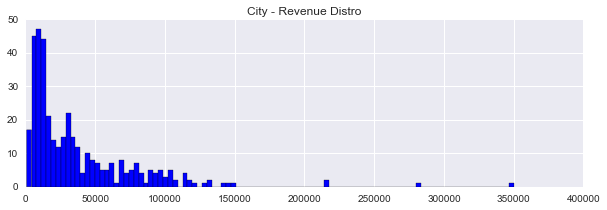

In [74]:
salesdatacity2015["Revenue (Dollars)"].hist(figsize = (10,3), bins = 100, color = "blue")
ax = plt.gca()
ax.set_title("City - Revenue Distro")

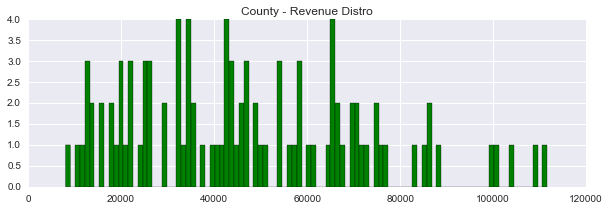

In [75]:
salesdatacounty2015["Revenue (Dollars)"].hist(figsize = (10,3), color = "green", bins = 100)
ax = plt.gca()
ax.set_title("County - Revenue Distro")

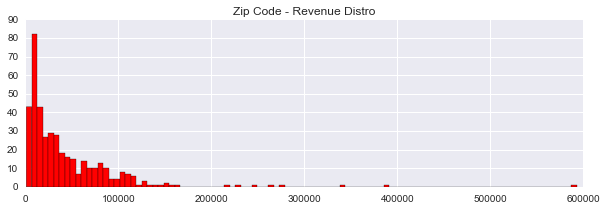

In [76]:
salesdatazip2015["Revenue (Dollars)"].hist(figsize = (10,3), color = "red", bins = 100)
ax = plt.gca()
ax.set_title("Zip Code - Revenue Distro")

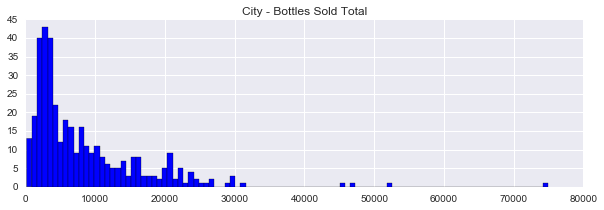

In [77]:
salesdatacity2015["Bottles Sold"].hist(figsize = (10,3), bins = 100, color = "blue")
ax = plt.gca()
ax.set_title("City - Bottles Sold Total")

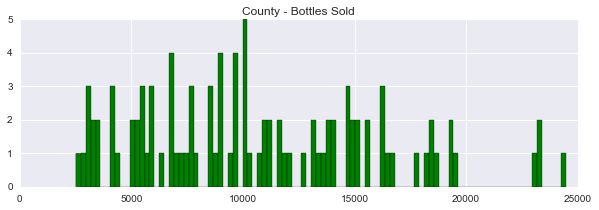

In [78]:
salesdatacounty2015["Bottles Sold"].hist(figsize = (10,3), color = "green", bins = 100)
ax = plt.gca()
ax.set_title("County - Bottles Sold")

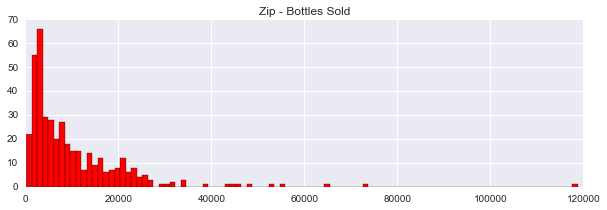

In [79]:
salesdatazip2015["Bottles Sold"].hist(figsize = (10,3), color = "red", bins = 100)
ax = plt.gca()
ax.set_title("Zip - Bottles Sold")

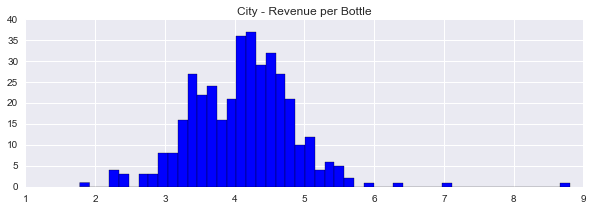

In [80]:
salesdatacity2015["Revenue per Bottle"].hist(figsize = (10,3), bins = 50, color = "blue")
ax = plt.gca()
ax.set_title("City - Revenue per Bottle")

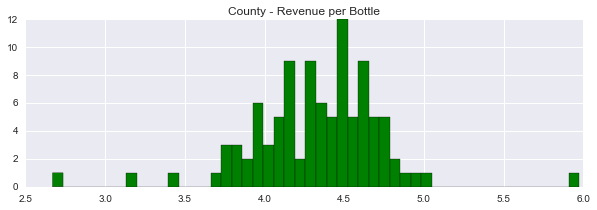

In [81]:
salesdatacounty2015["Revenue per Bottle"].hist(figsize = (10,3), bins = 50, color = "green")
ax = plt.gca()
ax.set_title("County - Revenue per Bottle")

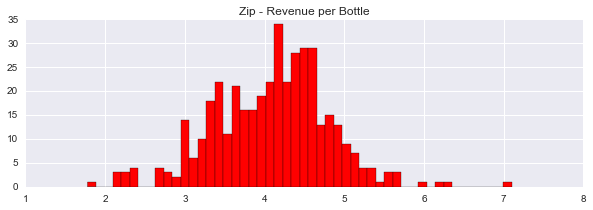

In [82]:
salesdatazip2015["Revenue per Bottle"].hist(figsize = (10,3), bins = 50, color = "red")
ax = plt.gca()
ax.set_title("Zip - Revenue per Bottle")

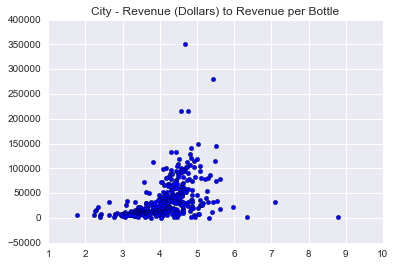

In [83]:
plt.scatter(x=salesdatacity2015["Revenue per Bottle"], y = salesdatacity2015["Revenue (Dollars)"])
ax = plt.gca()
ax.set_title("City - Revenue (Dollars) to Revenue per Bottle")

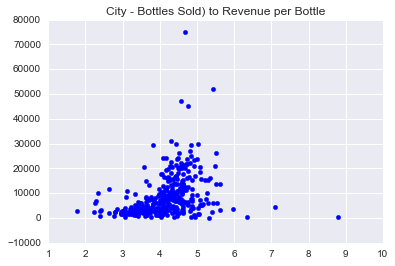

In [84]:
plt.scatter(x=salesdatacity2015["Revenue per Bottle"], y = salesdatacity2015["Bottles Sold"], color = "blue")
ax = plt.gca()
ax.set_title("City - Bottles Sold) to Revenue per Bottle")

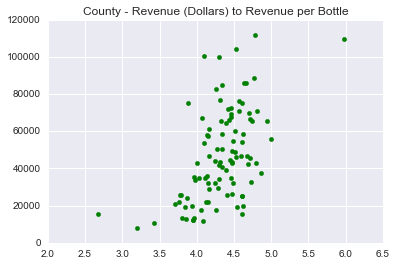

In [85]:
plt.scatter(x=salesdatacounty2015["Revenue per Bottle"], y = salesdatacounty2015["Revenue (Dollars)"], color = "green")
ax = plt.gca()
ax.set_title("County - Revenue (Dollars) to Revenue per Bottle")

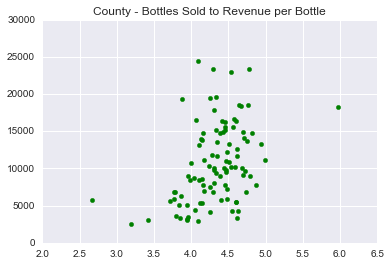

In [86]:
plt.scatter(x=salesdatacounty2015["Revenue per Bottle"], y = salesdatacounty2015["Bottles Sold"], color = "green")
ax = plt.gca()
ax.set_title("County - Bottles Sold to Revenue per Bottle")

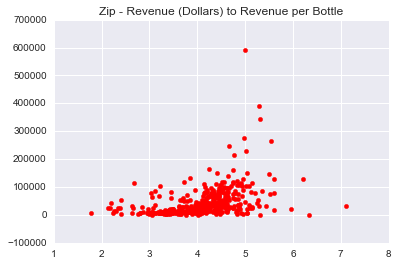

In [87]:
plt.scatter(x=salesdatazip2015["Revenue per Bottle"], y = salesdatazip2015["Revenue (Dollars)"], color = "red")
ax = plt.gca()
ax.set_title("Zip - Revenue (Dollars) to Revenue per Bottle")

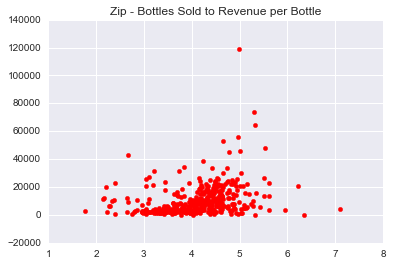

In [88]:
plt.scatter(x=salesdatazip2015["Revenue per Bottle"], y = salesdatazip2015["Bottles Sold"], color = "red")
ax = plt.gca()
ax.set_title("Zip - Bottles Sold to Revenue per Bottle")

In [89]:
salesdatacity2015.sort_values("Revenue (Dollars)", ascending = False).head()

,City,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,Stores in City
0,MOUNT VERNON,74947.000000,350034.230000,1.048953e+06,4.670423,13.995936,2
1,WINDSOR HEIGHTS,51833.333333,281053.468333,8.409203e+05,5.422253,16.223543,6
3,OTTUWMA,47250.000000,215794.070000,6.452447e+05,4.567070,13.655973,1
2,MILFORD,45155.000000,215430.285000,6.453400e+05,4.770907,14.291662,2
4,BETTENDORF,29724.500000,149542.286667,4.479600e+05,5.030944,15.070395,12


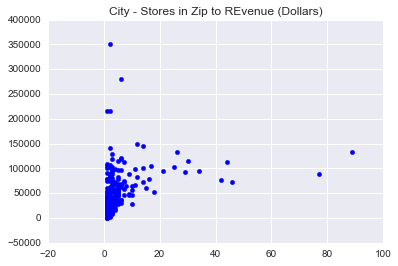

In [91]:
plt.scatter(x=salesdatacity2015["Stores in City"], y = salesdatacity2015["Revenue (Dollars)"], color = "Blue")
ax = plt.gca()
ax.set_title("City - Stores in Zip to REvenue (Dollars)")

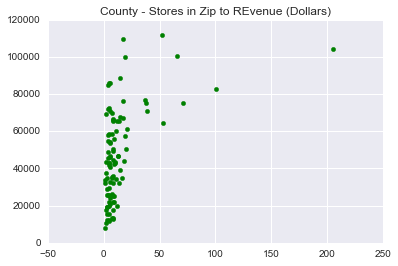

In [92]:
plt.scatter(x=salesdatacounty2015["Stores in County"], y = salesdatacounty2015["Revenue (Dollars)"], color = "Green")
ax = plt.gca()
ax.set_title("County - Stores in Zip to REvenue (Dollars)")

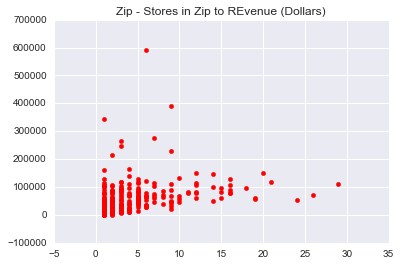

In [93]:
plt.scatter(x=salesdatazip2015["Stores in Zip"], y = salesdatazip2015["Revenue (Dollars)"], color = "red")
ax = plt.gca()
ax.set_title("Zip - Stores in Zip to REvenue (Dollars)")

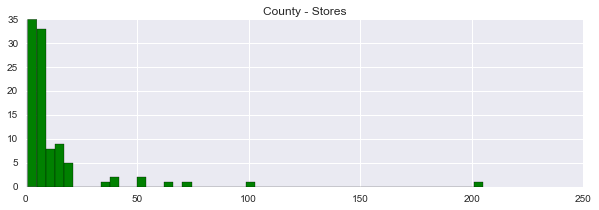

In [97]:
salesdatacounty2015["Stores in County"].hist(figsize = (10,3), bins = 50, color = "green")
ax = plt.gca()
ax.set_title("County - Stores")

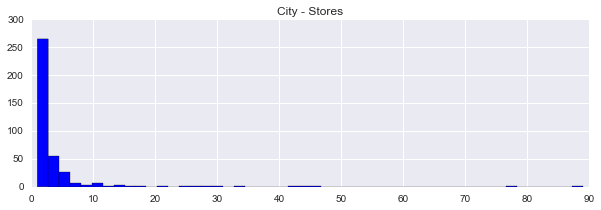

In [99]:
salesdatacity2015["Stores in City"].hist(figsize = (10,3), bins = 50, color = "blue")
ax = plt.gca()
ax.set_title("City - Stores")

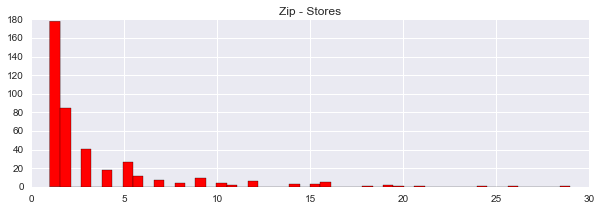

In [100]:
salesdatazip2015["Stores in Zip"].hist(figsize = (10,3), bins = 50, color = "red")
ax = plt.gca()
ax.set_title("Zip - Stores")

In [185]:
salesdatacity2015["Revenue (Dollars)"].argmax()

0

In [187]:
salesdatacity2015.sort_values("Revenue (Dollars)", ascending = False).head(10)
#outliers - consider removing index 0,1,3,2

,City,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,Stores in City
0,MOUNT VERNON,74947.000000,350034.230000,1.048953e+06,4.670423,13.995936,2
1,WINDSOR HEIGHTS,51833.333333,281053.468333,8.409203e+05,5.422253,16.223543,6
3,OTTUWMA,47250.000000,215794.070000,6.452447e+05,4.567070,13.655973,1
2,MILFORD,45155.000000,215430.285000,6.453400e+05,4.770907,14.291662,2
4,BETTENDORF,29724.500000,149542.286667,4.479600e+05,5.030944,15.070395,12
5,CORALVILLE,26379.538462,145317.750000,4.349468e+05,5.508730,16.488038,14
6,LEMARS,29282.500000,141299.765000,4.214100e+05,4.825400,14.391190,2
7,IOWA CITY,30020.961538,133525.981538,3.996482e+05,4.447758,13.312307,26
8,DES MOINES,31030.865169,133354.984270,3.994189e+05,4.297495,12.871666,89
9,PLEASANT HILL,26950.000000,129521.426667,3.867332e+05,4.805990,14.350024,3


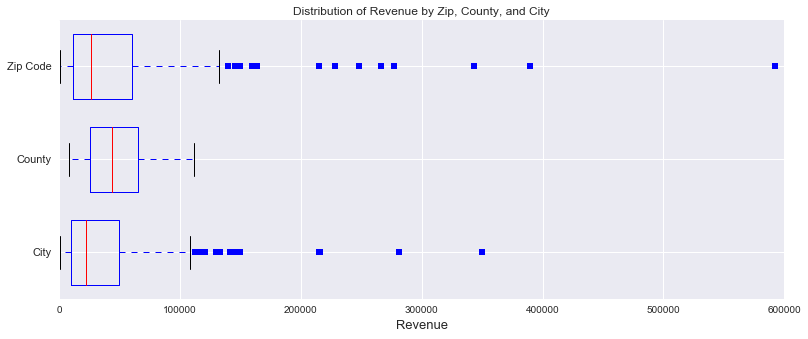

In [471]:
import pylab as P
revenues = [salesdatacity2015["Revenue (Dollars)"], salesdatacounty2015["Revenue (Dollars)"], salesdatazip2015["Revenue (Dollars)"]]
fig = plt.figure(figsize=(13,5))
ax = P.boxplot(revenues, 0, "rs", 0, widths = .7)
P.title("Distribution of Revenue by Zip, County, and City")
P.xlabel("Revenue", fontsize = 13)
P.yticks([1, 2, 3], ["City", "County", "Zip Code"], fontsize = 11)
plt.show()

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

- City and Zip are more closely related than County
- Bottles Sold and Revenue across all 3 have a heavy right skew with the exception of County
- Revenue per bottle (calculated at the zip, county and city level) though is fairly normally distributed
- REvenue per bottle is kind of correlated to Bottles Sold and Revenue
- Volume of stores within City, Zip, and County don't seem super related but might require more investigation

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

## doing scenario 2
- Predicting the highest Revenue per store using amount of stores in a region

In [225]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

In [102]:
countyrevenue=salesdatacounty2015["Revenue (Dollars)"]
cityrevenue=salesdatacity2015["Revenue (Dollars)"]
ziprevenue=salesdatazip2015["Revenue (Dollars)"]

countybottles=salesdatacounty2015["Bottles Sold"]
citybottles=salesdatacity2015["Bottles Sold"]
zipbottles=salesdatazip2015["Bottles Sold"]

In [103]:
countystores =  salesdatacounty2015["Stores in County"]
citystores = salesdatacity2015["Stores in City"]
zipstores = salesdatazip2015["Stores in Zip"]

In [194]:
#experimented with removing outliers but it didn't really work out
cityoutliers = salesdatacity2015.drop([0,1,2,3])
cityoutliers.head()

,City,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,Stores in City
4,BETTENDORF,29724.500000,149542.286667,447959.966667,5.030944,15.070395,12
5,CORALVILLE,26379.538462,145317.750000,434946.833077,5.508730,16.488038,14
6,LEMARS,29282.500000,141299.765000,421410.035000,4.825400,14.391190,2
7,IOWA CITY,30020.961538,133525.981538,399648.245385,4.447758,13.312307,26
8,DES MOINES,31030.865169,133354.984270,399418.925955,4.297495,12.871666,89


In [195]:
cityrevenueoutliers = pd.DataFrame(cityoutliers["Revenue (Dollars)"])

In [196]:
citystoresoutliers = pd.DataFrame(cityoutliers["Stores in City"])

In [135]:
countystores = pd.DataFrame(countystores)

In [136]:
countystores.shape

(99, 1)

In [137]:
countyrevenue = pd.DataFrame(countyrevenue)
countyrevenue.shape

(99, 1)

In [155]:
citystores = pd.DataFrame(citystores)
zipstores = pd.DataFrame(zipstores)
cityrevenue = pd.DataFrame(cityrevenue)
ziprevenue = pd.DataFrame(ziprevenue)
countybottles = pd.DataFrame(countybottles)
citybottles = pd.DataFrame(citybottles)
zipbottles = pd.DataFrame(zipbottles)

In [163]:
cityrevenue.head()

,Revenue (Dollars)
0,350034.230000
1,281053.468333
2,215430.285000
3,215794.070000
4,149542.286667


In [99]:
#all this was done when i was making dummy data for the wrong thing - ignore subsequent lines up until the markdown column
city_dummies = pd.get_dummies(salesdatacity2015["City"])
city_dummies

,ACKLEY,ADAIR,ADEL,AFTON,AKRON,ALBIA,ALDEN,ALGONA,ALLISON,ALTA,...,WEST UNION,WHEATLAND,WILLIAMSBURG,WILTON,WINDSOR HEIGHTS,WINTERSET,WINTHROP,WOODBINE,WOODWARD,ZWINGLE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
salesdatacity2015 = pd.concat([salesdatacity2015, city_dummies], axis = 1)
salesdatacity2015.head()

,City,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,ACKLEY,ADAIR,ADEL,AFTON,...,WEST UNION,WHEATLAND,WILLIAMSBURG,WILTON,WINDSOR HEIGHTS,WINTERSET,WINTHROP,WOODBINE,WOODWARD,ZWINGLE
0,MOUNT VERNON,74947.000000,350034.230000,1.048953e+06,4.670423,13.995936,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,WINDSOR HEIGHTS,51833.333333,281053.468333,8.409203e+05,5.422253,16.223543,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,MILFORD,45155.000000,215430.285000,6.453400e+05,4.770907,14.291662,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,OTTUWMA,47250.000000,215794.070000,6.452447e+05,4.567070,13.655973,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BETTENDORF,29724.500000,149542.286667,4.479600e+05,5.030944,15.070395,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
zipcode_dummies = pd.get_dummies(salesdatazip2015["Zip Code"])
zipcode_dummies.head()

,50317,51002,52402,52404,52625,50002,50003,50006,50009,50010,...,52777,52778,52801,52802,52803,52804,52806,52807,56201,712-2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
salesdatazip2015 = pd.concat([salesdatazip2015, zipcode_dummies], axis = 1)
salesdatazip2015.head()

,Zip Code,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,50317,51002,52402,52404,...,52777,52778,52801,52802,52803,52804,52806,52807,56201,712-2
0,50314,118781.833333,592550.795000,1.776288e+06,4.988564,14.954207,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50320,73496.333333,389229.883333,1.166749e+06,5.295909,15.874923,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52411,64511.000000,342977.510000,1.024513e+06,5.316574,15.881219,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50311,55823.285714,277275.774286,8.294684e+05,4.967027,14.858824,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52401,48168.000000,266391.113333,7.986031e+05,5.530458,16.579536,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
county_dummies = pd.get_dummies(salesdatacounty2015["County"])
county_dummies.head()

,Adair,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
salesdatacounty2015 = pd.concat([salesdatacounty2015, county_dummies], axis =1)
salesdatacounty2015.head()

,County,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,Adair,Adams,Allamakee,Appanoose,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,Johnson,23369.153846,111620.882115,334072.796538,4.776419,14.295460,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Dallas,18313.705882,109422.236471,327208.174118,5.974882,17.866847,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Polk,22963.549020,104113.469510,311615.745931,4.533858,13.570017,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Scott,24478.476923,100318.974923,300406.953385,4.098252,12.272289,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cerro Gordo,23304.947368,100050.805789,298942.063684,4.293114,12.827408,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
countydata = salesdatacounty2015.iloc[:, 7:]
citydata = salesdatacity2015.iloc[:, 7:]
zipdata = salesdatazip2015.iloc[:, 7:]

In [113]:
zipdata.head()

,51002,52402,52404,52625,50002,50003,50006,50009,50010,50014,...,52777,52778,52801,52802,52803,52804,52806,52807,56201,712-2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
countydata.head()

,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,Buena Vista,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

       X Shape  Y Shape
Train (66, 1) (66, 1)
Test  (33, 1) (33, 1)
Score: -0.918966556833
MSE: 438111500.729
MAE: 16814.1119121
Coefficients: [[ 454.85144158]]
Y intercept: 40126.46


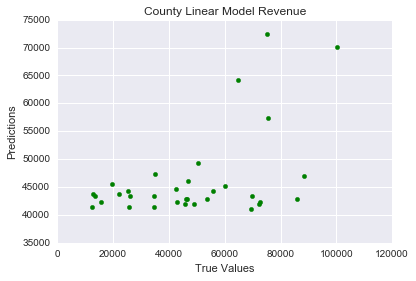

In [416]:
#County 
X_trainct, X_testct, y_trainct, y_testct = train_test_split(countystores, countyrevenue, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_trainct.shape, y_trainct.shape
print "Test ", X_testct.shape, y_testct.shape

lmct = linear_model.LinearRegression()
modelct = lm.fit(X_trainct, y_trainct)
predictionsct = lm.predict(X_testct)

plt.scatter(y_testct, predictionsct, color = "green")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("County Linear Model Revenue")
print "Score:", model.score(X_testct, y_testct)
print "MSE:", mean_squared_error(y_testct, predictionsct)
print "MAE:", mean_absolute_error(y_testct, predictionsct)

print "Coefficients:", modelct.coef_
print "Y intercept: %.2f" %modelct.intercept_

       X Shape  Y Shape
Train (66, 1) (66, 1)
Test  (33, 1) (33, 1)
Score: -0.130150589963
MSE: 910288749.962
MAE: 24105.1818097


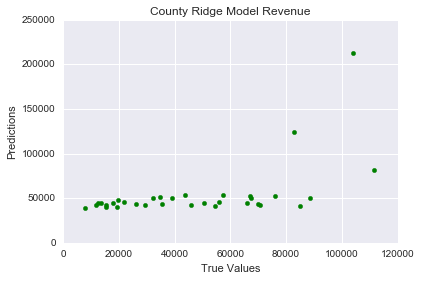

In [240]:
#County 
X_train, X_test, y_train, y_test = train_test_split(countystores, countyrevenue, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lm = linear_model.Ridge()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, color = "green")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("County Ridge Model Revenue")
print "Score:", model.score(X_test, y_test)
print "MSE:", mean_squared_error(y_test, predictions)
print "MAE:", mean_absolute_error(y_test, predictions)


       X Shape  Y Shape
Train (66, 1) (66, 1)
Test  (33, 1) (33, 1)
Score: 0.0470779903499
MSE: 759627124.061
MAE: 22117.7622521


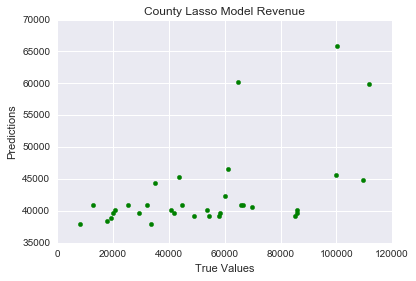

In [232]:
#County 
X_train, X_test, y_train, y_test = train_test_split(countystores, countyrevenue, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lm = linear_model.Lasso()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, color = "green")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("County Lasso Model Revenue")
print "Score:", model.score(X_test, y_test)
print "MSE:", mean_squared_error(y_test, predictions)
print "MAE:", mean_absolute_error(y_test, predictions)

       X Shape  Y Shape
Train (66, 1) (66, 1)
Test  (33, 1) (33, 1)
Score: 0.301965419735
MSE: 17992812.3495
MAE: 3570.40990296


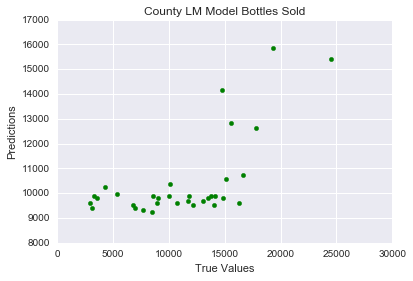

In [237]:
#County 
X_train, X_test, y_train, y_test = train_test_split(countystores, countybottles, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, color = "green")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("County LM Model Bottles Sold")
print "Score:", model.score(X_test, y_test)
print "MSE:", mean_squared_error(y_test, predictions)
print "MAE:", mean_absolute_error(y_test, predictions)

       X Shape  Y Shape
Train (66, 1) (66,)
Test  (33, 1) (33,)
Score: -0.716357270374
MSE: 29344035.8807
MAE: 3388.71906343


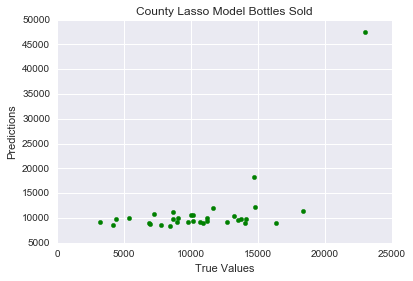

In [152]:
#County 
X_train, X_test, y_train, y_test = train_test_split(countystores, countybottles, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lm = linear_model.Lasso()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, color = "green")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("County Lasso Model Bottles Sold")
print "Score:", model.score(X_test, y_test)
print "MSE:", mean_squared_error(y_test, predictions)
print "MAE:", mean_absolute_error(y_test, predictions)

       X Shape  Y Shape
Train (66, 1) (66,)
Test  (33, 1) (33,)
Score: 0.0906466795694
MSE: 28256454.1382
MAE: 4043.96531401


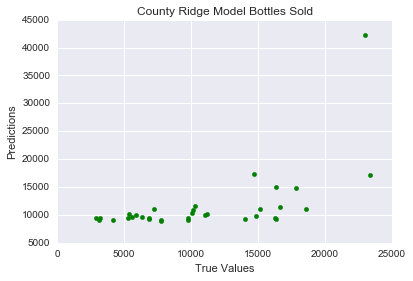

In [153]:
#County 
X_train, X_test, y_train, y_test = train_test_split(countystores, countybottles, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lm = linear_model.Ridge()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, color = "green")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("County Ridge Model Bottles Sold")
print "Score:", model.score(X_test, y_test)
print "MSE:", mean_squared_error(y_test, predictions)
print "MAE:", mean_absolute_error(y_test, predictions)

       X Shape  Y Shape
Train (255, 1) (255, 1)
Test  (126, 1) (126, 1)
Score: 0.189191049977
MSE: 1441106797.71
MAE: 28837.5534273
Coefficients: [[ 1876.86019507]]
Y intercept: 30249.27


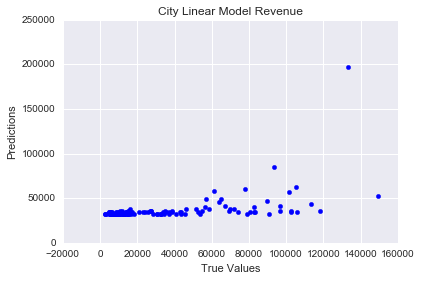

In [392]:
#City - PERFORMING THE BEST SO FAR
X_trainc, X_testc, y_trainc, y_testc = train_test_split(citystores, cityrevenue, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lmcity = linear_model.LinearRegression()
modelcity = lm.fit(X_train, y_train)
predictionscity = lm.predict(X_test)

plt.scatter(y_test, predictionscity, color = "blue")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("City Linear Model Revenue")
print "Score:", modelcity.score(X_testc, y_testc)
print "MSE:", mean_squared_error(y_testc, predictionscity)
print "MAE:", mean_absolute_error(y_testc, predictionscity)

print "Coefficients:", modelcity.coef_
print "Y intercept: %.2f" %modelcity.intercept_

       X Shape  Y Shape
Train (255, 1) (255, 1)
Test  (126, 1) (126, 1)
Score: 0.0398410883383
MSE: 2123009280.73
MAE: 26757.8175417


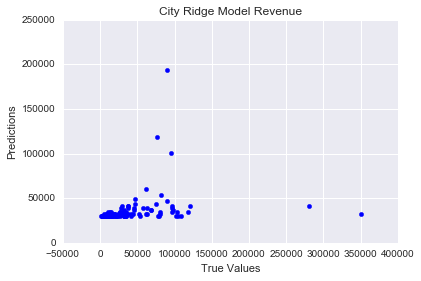

In [157]:
#City
X_train, X_test, y_train, y_test = train_test_split(citystores, cityrevenue, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lm = linear_model.Ridge()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, color = "blue")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("City Ridge Model Revenue")
print "Score:", model.score(X_test, y_test)
print "MSE:", mean_squared_error(y_test, predictions)
print "MAE:", mean_absolute_error(y_test, predictions)

       X Shape  Y Shape
Train (255, 1) (255, 1)
Test  (126, 1) (126, 1)
Score: 0.113992032301
MSE: 852375353.02
MAE: 21875.1021095


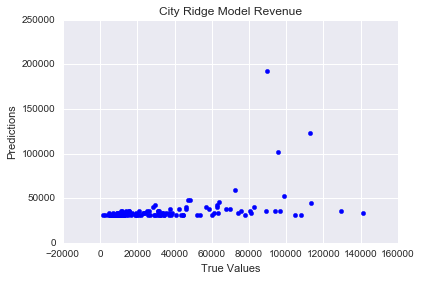

In [179]:
#City
X_train, X_test, y_train, y_test = train_test_split(citystores, cityrevenue, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lm = linear_model.Ridge()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, color = "blue")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("City Ridge Model Revenue")
print "Score:", model.score(X_test, y_test)
print "MSE:", mean_squared_error(y_test, predictions)
print "MAE:", mean_absolute_error(y_test, predictions)

       X Shape  Y Shape
Train (255, 1) (255, 1)
Test  (126, 1) (126, 1)
Score: 0.00863059316967
MSE: 2349958539.49
MAE: 27114.873186


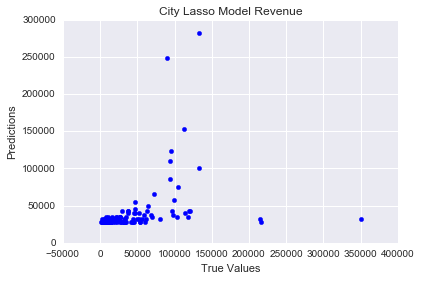

In [158]:
#City
X_train, X_test, y_train, y_test = train_test_split(citystores, cityrevenue, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lm = linear_model.Lasso()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, color = "blue")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("City Lasso Model Revenue")
print "Score:", model.score(X_test, y_test)
print "MSE:", mean_squared_error(y_test, predictions)
print "MAE:", mean_absolute_error(y_test, predictions)

       X Shape  Y Shape
Train (255, 1) (255, 1)
Test  (126, 1) (126, 1)
Score: 0.149661546126
MSE: 45343732.2703
MAE: 4894.30938975


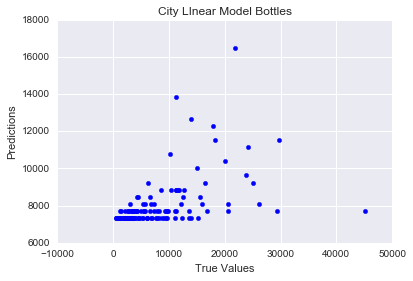

In [244]:
#City
X_train, X_test, y_train, y_test = train_test_split(citystores, citybottles, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, color = "blue")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("City LInear Model Bottles")
print "Score:", model.score(X_test, y_test)
print "MSE:", mean_squared_error(y_test, predictions)
print "MAE:", mean_absolute_error(y_test, predictions)

       X Shape  Y Shape
Train (309, 1) (309, 1)
Test  (104, 1) (104, 1)
Score: 0.203706407701
MSE: 813340769.356
MAE: 23571.8730298
Coefficients: [[ 4976.13748161]]
Y intercept: 27807.45


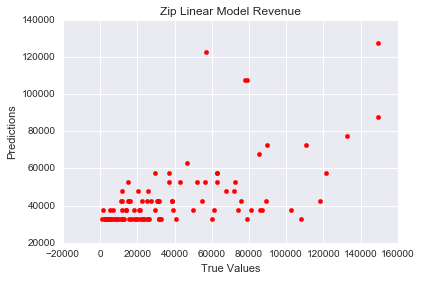

In [412]:
#Zip
X_trainz, X_testz, y_trainz, y_testz = train_test_split(zipstores, ziprevenue, test_size=0.25) 

print "       X Shape  Y Shape"
print "Train", X_trainz.shape, y_trainz.shape
print "Test ", X_testz.shape, y_testz.shape

lmzip = linear_model.LinearRegression()
modelzip = lm.fit(X_trainz, y_trainz)
predictionszip = lm.predict(X_testz)

plt.scatter(y_testz, predictionszip, color = "red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Zip Linear Model Revenue")
print "Score:", model.score(X_testz, y_testz)
print "MSE:", mean_squared_error(y_testz, predictionszip)
print "MAE:", mean_absolute_error(y_testz, predictionszip)

print "Coefficients:", modelzip.coef_
print "Y intercept: %.2f" %modelzip.intercept_

       X Shape  Y Shape
Train (276, 1) (276, 1)
Test  (137, 1) (137, 1)
Score: 0.119745038617
MSE: 4436109225.87
MAE: 32419.0131993


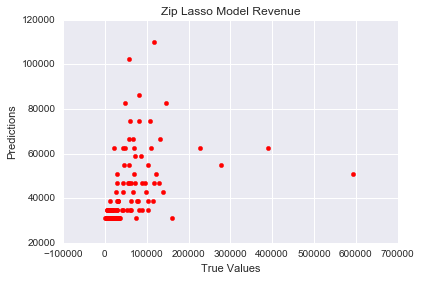

In [255]:
#Zip
X_train, X_test, y_train, y_test = train_test_split(zipstores, ziprevenue, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lm = linear_model.Lasso()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, color = "red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Zip Lasso Model Revenue")
print "Score:", model.score(X_test, y_test)
print "MSE:", mean_squared_error(y_test, predictions)
print "MAE:", mean_absolute_error(y_test, predictions)

       X Shape  Y Shape
Train (276, 1) (276, 1)
Test  (137, 1) (137, 1)
Score: 0.142211082788
MSE: 3121286642.13
MAE: 30335.2469981


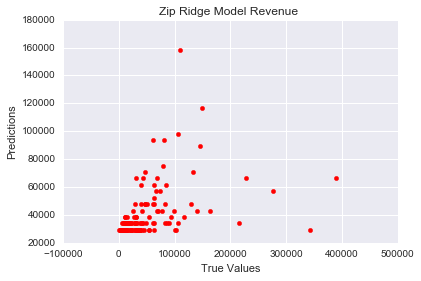

In [256]:
#Zip
X_train, X_test, y_train, y_test = train_test_split(zipstores, ziprevenue, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lm = linear_model.Ridge()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, color = "red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Zip Ridge Model Revenue ")
print "Score:", model.score(X_test, y_test)
print "MSE:", mean_squared_error(y_test, predictions)
print "MAE:", mean_absolute_error(y_test, predictions)

       X Shape  Y Shape
Train (276, 1) (276, 1)
Test  (137, 1) (137, 1)
Score: 0.373019859577
MSE: 41351869.9905
MAE: 5248.52378468


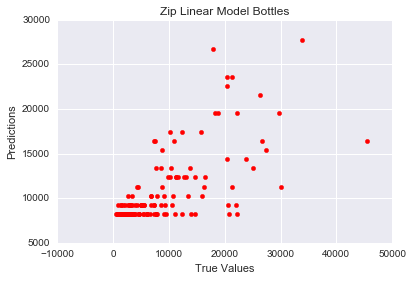

In [257]:
#Zip
X_train, X_test, y_train, y_test = train_test_split(zipstores, zipbottles, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, color = "red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Zip Linear Model Bottles")
print "Score:", model.score(X_test, y_test)
print "MSE:", mean_squared_error(y_test, predictions)
print "MAE:", mean_absolute_error(y_test, predictions)

       X Shape  Y Shape
Train (276, 1) (276, 1)
Test  (137, 1) (137, 1)
Score: 0.113613911393
MSE: 186900876.603
MAE: 6739.59128776


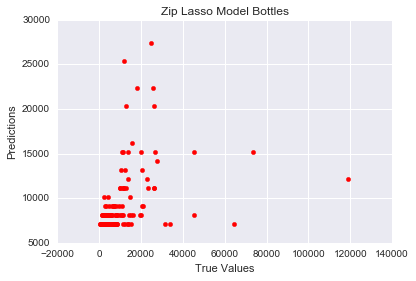

In [258]:
#Zip
X_train, X_test, y_train, y_test = train_test_split(zipstores, zipbottles, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lm = linear_model.Lasso()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, color = "red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Zip Lasso Model Bottles")
print "Score:", model.score(X_test, y_test)
print "MSE:", mean_squared_error(y_test, predictions)
print "MAE:", mean_absolute_error(y_test, predictions)

       X Shape  Y Shape
Train (276, 1) (276, 1)
Test  (137, 1) (137, 1)
Score: 0.138977998726
MSE: 148397799.527
MAE: 6301.31394701


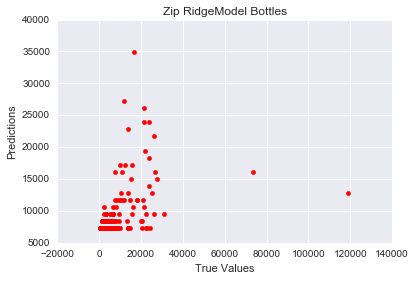

In [259]:
#Zip
X_train, X_test, y_train, y_test = train_test_split(zipstores, zipbottles, test_size=0.33) 

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lm = linear_model.Ridge()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions, color = "red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Zip RidgeModel Bottles")
print "Score:", model.score(X_test, y_test)
print "MSE:", mean_squared_error(y_test, predictions)
print "MAE:", mean_absolute_error(y_test, predictions)

- County's best correlation is for the revenue using a linear model
- City's best correlation for revenue is linear model
- Zips best is linear
- Will focus on the  revenue sales since this seems to be pretty much the same as bottles sold

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [386]:
from sklearn.cross_validation import cross_val_score

Score: 0.138740369105
MSE: 1387266591.0
MAE: 24613.652431
Cross Val Score Mean:  -98.2951616886


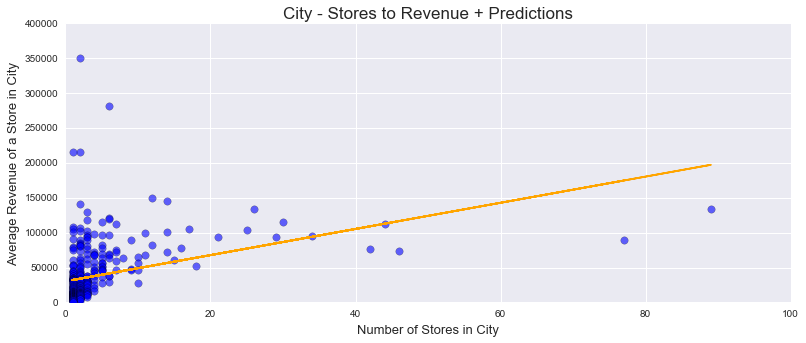

In [398]:
#City 

print "Score:", modelcity.score(citystores.values, cityrevenue.values)
print "MSE:", mean_squared_error(cityrevenue.values, [1876.86019507*x + 30249.27 for x in citystores.values])
print "MAE:", mean_absolute_error(cityrevenue.values, [1876.86019507*x + 30249.27 for x in citystores.values])
print "Cross Val Score Mean: ", cross_val_score(lmcity, citystores.values, cityrevenue.values, cv=5).mean()

plt.figure(figsize=(13,5))
plt.scatter(citystores.values, cityrevenue.values, s = 55, alpha = .6)
plt.plot(citystores.values, [1876.86019507*x + 30249.27 for x in citystores.values], color='orange')
ax = plt.gca()
ax.set_title("City - Stores to Revenue + Predictions", size = 17)
ax.set_xlabel("Number of Stores in City", size = 13)
ax.set_ylabel("Average Revenue of a Store in City", size = 13)
ax.set_ylim(0, 400000)
ax.set_xlim(0, 100)
plt.show()

Score: 0.149380206125
MSE: 2530844934.36
MAE: 28427.3535558
Cross Val Score Mean:  -81.8887137784


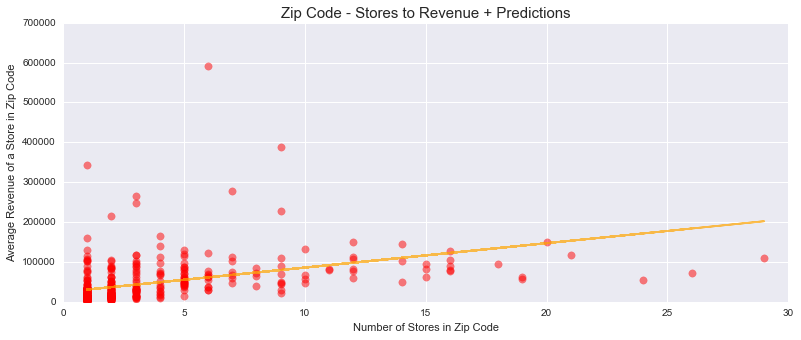

In [414]:
#BEST PERFORMING ONE
print "Score:", modelzip.score(zipstores.values, ziprevenue.values)
print "MSE:", mean_squared_error(ziprevenue.values, [6124.78368768*x + 24494.87 for x in zipstores.values])
print "MAE:", mean_absolute_error(ziprevenue.values, [6124.78368768*x + 24494.87 for x in zipstores.values])
print "Cross Val Score Mean: ", cross_val_score(lmzip, zipstores.values, ziprevenue.values, cv=5).mean()


plt.figure(figsize=(13,5))
plt.scatter(zipstores.values, ziprevenue.values, color = "red", s=55, alpha = .5)
plt.plot(zipstores.values, [6124.78368768*x + 24494.87 for x in zipstores.values], color='orange', alpha = .7)
ax = plt.gca()
ax.set_title("Zip Code - Stores to Revenue + Predictions", size = 15)
ax.set_xlabel("Number of Stores in Zip Code")
ax.set_ylabel("Average Revenue of a Store in Zip Code")
ax.set_ylim(0, 700000)
ax.set_xlim(0, 30)
plt.show()

Score: 0.23638339393
MSE: 466893072.885
MAE: 17593.1383896
Cross Val Score Mean:  -22.2499734146


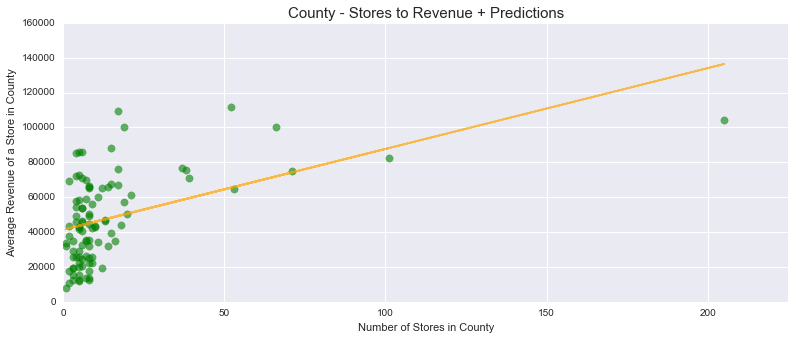

In [417]:
print "Score:", modelct.score(countystores.values, countyrevenue.values)
print "MSE:", mean_squared_error(countyrevenue.values, [463.6712304*x + 41262.82 for x in countystores.values])
print "MAE:", mean_absolute_error(countyrevenue.values, [463.6712304*x + 41262.82 for x in countystores.values])
print "Cross Val Score Mean: ", cross_val_score(lmct, countystores.values, countyrevenue.values, cv=5).mean()

plt.figure(figsize=(13,5))
plt.scatter(countystores.values, countyrevenue.values, color = "green", s=55, alpha = .6)
plt.plot(countystores.values, [463.6712304*x + 41262.82 for x in countystores.values], color='orange', alpha = .7)
ax = plt.gca()
ax.set_title("County - Stores to Revenue + Predictions", size = 15)
ax.set_xlabel("Number of Stores in County")
ax.set_ylabel("Average Revenue of a Store in County")
ax.set_xlim(0, 225)
plt.show()
    

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

### My Results

Final model predicts the average revenue (total sales in dollars minus cost) of a store, given the number of stores in a specific zip code.

Average revenue was predicted for all of 2015 to keep it clean.

The hypothesis is that competition for a specific area (i.e. number of stores in an area) would impact the revenue of a specific store in a region. The output of this model would show if a store in an area with high competition would generate more or less revenue.

Zip was chosen as the primary model because:
- Although County performance was the best out of the Zip, County and City, County seemed to a heavy right tail skew, more so than the others. 
- City performed the worst out of the other 3. 

Score: 0.024465704501
MSE: 2530844934.36
MAE: 28427.3535558
Cross Val Score Mean:  -81.8887137784


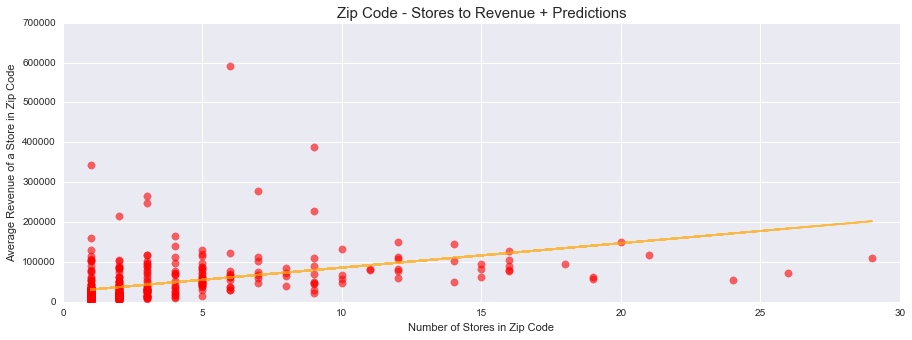

In [472]:
#BEST PERFORMING ONE
print "Score:", modelzip.score(zipstores.values, ziprevenue.values)
print "MSE:", mean_squared_error(ziprevenue.values, [6124.78368768*x + 24494.87 for x in zipstores.values])
print "MAE:", mean_absolute_error(ziprevenue.values, [6124.78368768*x + 24494.87 for x in zipstores.values])
print "Cross Val Score Mean: ", cross_val_score(lmzip, zipstores.values, ziprevenue.values, cv=5).mean()


plt.figure(figsize=(15,5))
plt.scatter(zipstores.values, ziprevenue.values, color = "red", s=55, alpha = .6)
plt.plot(zipstores.values, [6124.78368768*x + 24494.87 for x in zipstores.values], color='orange', alpha = .7)
ax = plt.gca()
ax.set_title("Zip Code - Stores to Revenue + Predictions", size = 15)
ax.set_xlabel("Number of Stores in Zip Code")
ax.set_ylabel("Average Revenue of a Store in Zip Code")
ax.set_ylim(0, 700000)
ax.set_xlim(0, 30)
plt.show()

What this model loosely shows is that stores that are in zip codes with a higher concentration of other stores, will generate more revenue.
This could possibly be because areas with more stores, tend to have more people whereas areas with less stores have less people in general, regardless of the competition. There might also be lower operational costs as a result of having a higher concentration of stores in the same area. 

In [428]:
salespresentzip = salesdatazip2015.drop(["Bottles Sold", "Sale (Dollars)", "Revenue per Bottle", "Sale per Bottle"], 1)

In [434]:
salespresentzip.head()

,Zip Code,Revenue (Dollars),Stores in Zip
0,50314,592550.795000,6
1,50320,389229.883333,9
2,52411,342977.510000,1
3,50311,277275.774286,7
4,52401,266391.113333,3


In [430]:
salesdatazip2015.head()

,Zip Code,Bottles Sold,Revenue (Dollars),Sale (Dollars),Revenue per Bottle,Sale per Bottle,Stores in Zip
0,50314,118781.833333,592550.795000,1.776288e+06,4.988564,14.954207,6
1,50320,73496.333333,389229.883333,1.166749e+06,5.295909,15.874923,9
2,52411,64511.000000,342977.510000,1.024513e+06,5.316574,15.881219,1
3,50311,55823.285714,277275.774286,8.294684e+05,4.967027,14.858824,7
4,52401,48168.000000,266391.113333,7.986031e+05,5.530458,16.579536,3


In [436]:
del salespresentzip["Revenue (Dollars)"]

In [438]:
salespresentzip["Revenue (Dollars)"] = salesdatazip2015["Revenue (Dollars)"]
salespresentzip.head()

,Zip Code,Stores in Zip,Revenue (Dollars)
0,50314,6,592550.795000
1,50320,9,389229.883333
2,52411,1,342977.510000
3,50311,7,277275.774286
4,52401,3,266391.113333


In [439]:
salespresentzip["Predicted Revenue (Dollars)"] = (6124.78368768*salespresentzip["Stores in Zip"]) + 24494.87
salespresentzip.head()

,Zip Code,Stores in Zip,Revenue (Dollars),Predicted Revenue (Dollars)
0,50314,6,592550.795000,61243.572126
1,50320,9,389229.883333,79617.923189
2,52411,1,342977.510000,30619.653688
3,50311,7,277275.774286,67368.355814
4,52401,3,266391.113333,42869.221063


In [447]:
salespresentzip.sort_values("Predicted Revenue (Dollars)", ascending = False).head()

,Zip Code,Stores in Zip,Revenue (Dollars),Predicted Revenue (Dollars)
29,52402,29,110145.367407,202113.596943
78,51501,26,72748.426923,183739.245880
113,52404,24,53439.278261,171489.678504
21,50010,21,116803.273333,153115.327441
11,52240,20,149421.754500,146990.543754


In [465]:
salespresentzip.sort_values("Revenue (Dollars)").head()

,Zip Code,Stores in Zip,Revenue (Dollars),Predicted Revenue (Dollars)
412,51453,1,870.06,30619.653688
411,52328,1,925.14,30619.653688
410,51535,1,961.74,30619.653688
409,52223,1,1306.77,30619.653688
408,52801,2,1331.40,36744.437375


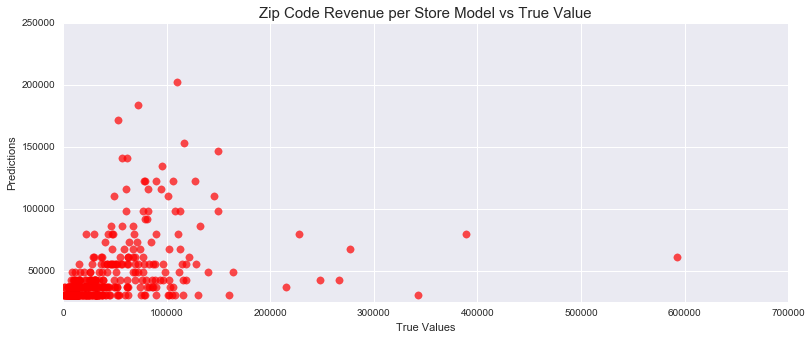

In [469]:
plt.figure(figsize=(13,5))
plt.scatter(salespresentzip["Revenue (Dollars)"], salespresentzip["Predicted Revenue (Dollars)"], color = "red", s = 55, alpha = .7)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Zip Code Revenue per Store Model vs True Value", size = 15)
ax = plt.gca()
ax.set_xlim(0, 700000)
ax.set_ylim(25000, 250000)
plt.show()

Given the model's low score, and incredibly high cross validation mean score, the model has not performed as well as it could. 
The recommended locations for a new store are currently the zip codes that have the highest concentration of stores. This is currently zip code 52402, 51501 and 52404. 
To further improve this model, another model could be built that could project the growth of average stores in a zip code using features like % of population in a zip code that is 21+, etc. 